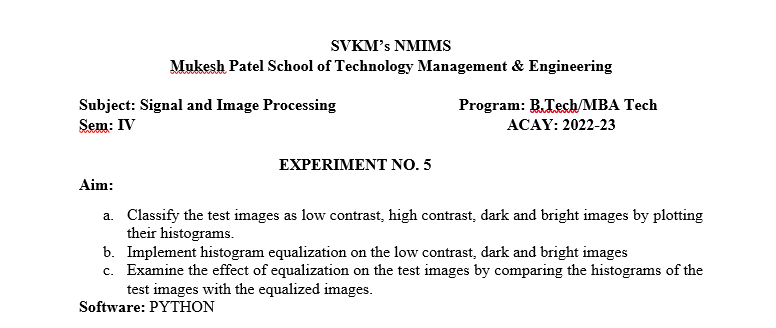

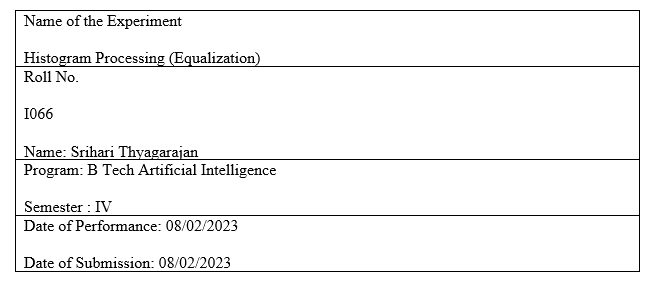

# Import libraries

In [27]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from google.colab.patches import cv2_imshow

# Reading all the image files

In [53]:
img_1 = cv2.imread(r"/content/Fig0316(1)(top_left).tif", 0)
img_2 = cv2.imread(r"/content/Fig0316(2)(2nd_from_top).tif", 0)
img_3 = cv2.imread(r"/content/Fig0316(3)(third_from_top).tif", 0)
img_4 = cv2.imread(r"/content/Fig0316(4)(bottom_left).tif", 0)
images = [img_1, img_2, img_3, img_4]

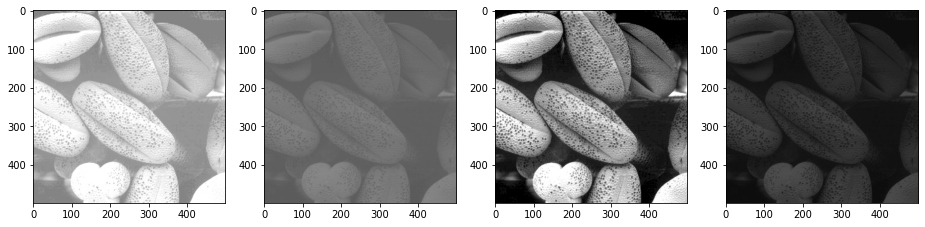

In [29]:
plt.figure(figsize = (20, 15))
plt.xticks([])
plt.yticks([])

for i in range(len(images)):
    plt.subplot(1, len(images) + 1, i + 1)
    plt.imshow(images[i], cmap = "gray", vmin = 0, vmax = 255)

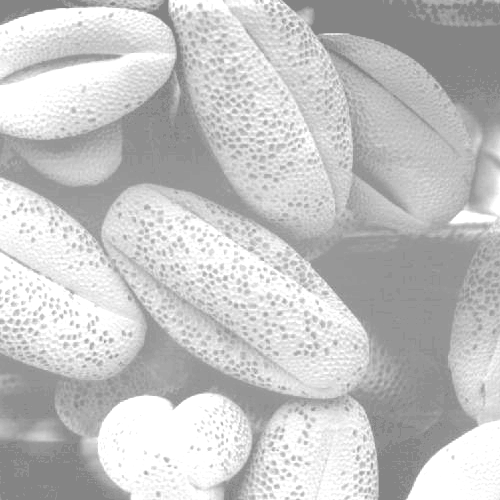

In [31]:
cv2_imshow(img_1)

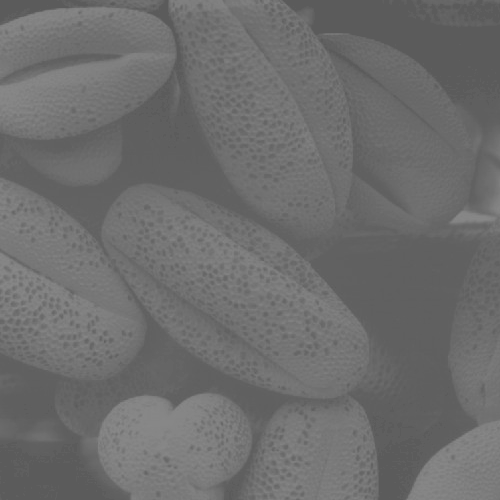

In [35]:
cv2_imshow(img_2)

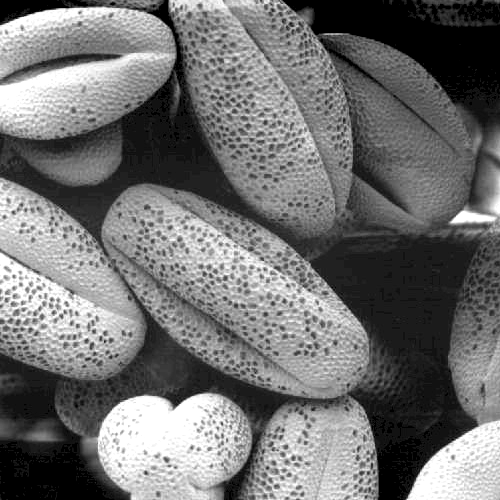

In [36]:
cv2_imshow(img_3)

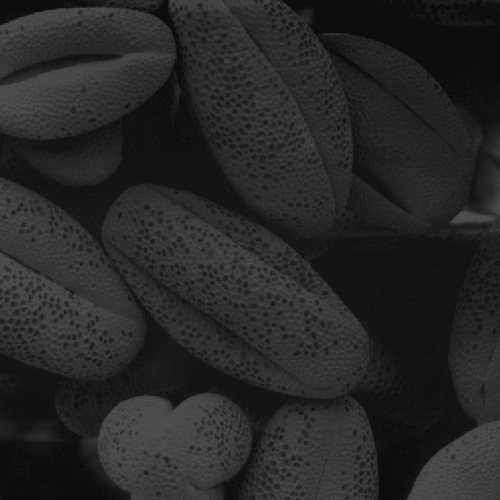

In [37]:
cv2_imshow(img_4)

In [38]:
img_1.shape

(500, 500, 3)

In [39]:
print("YES")
print(time.time())

YES
1675833739.7078853


# Method 1:
## Creating a built in function for plotting Histograms.

In [40]:
def histogram_plot(og_img):
    r = np.arange(0, 256, dtype = int)
    c = np.zeros(len(r), dtype = int)
    for k in r:
        c[k] = (og_img == k).sum()
    return (r, c)

<ipython-input-41-3e8b53d44ef3>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(r, c)
<ipython-input-41-3e8b53d44ef3>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(r, c)
<ipython-input-41-3e8b53d44ef3>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_col

([], <a list of 0 Text major ticklabel objects>)

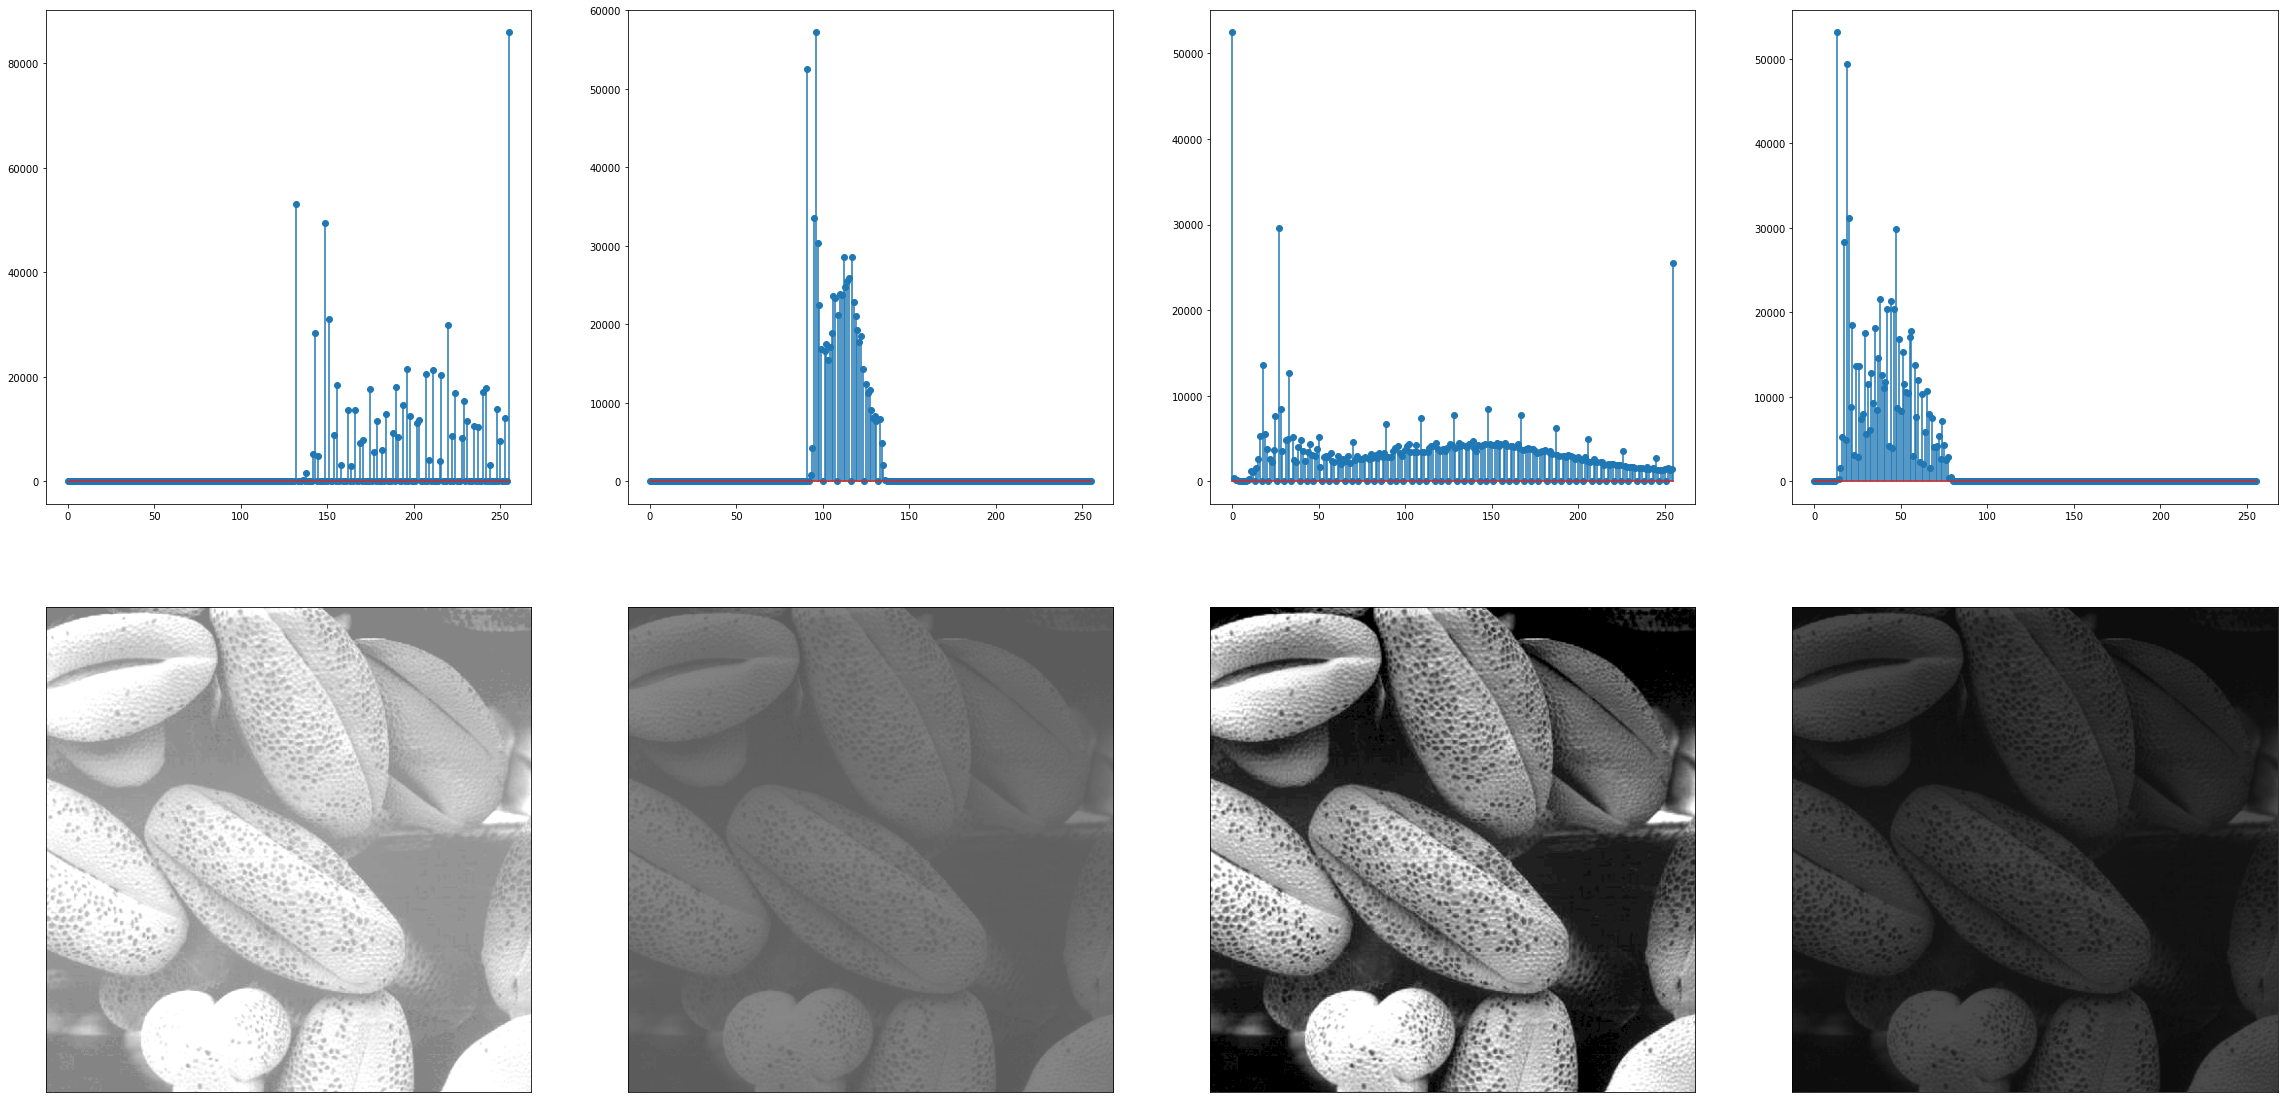

In [41]:
plt.figure(figsize = (40, 20))


plt.subplot(2, 4, 1)
r, c = histogram_plot(img_1)
plt.stem(r, c)

plt.subplot(2, 4, 2)
r, c = histogram_plot(img_2)
plt.stem(r, c)

plt.subplot(2, 4, 3)
r, c = histogram_plot(img_3)
plt.stem(r, c)

plt.subplot(2, 4, 4)
r, c = histogram_plot(img_4)
plt.stem(r, c)

plt.subplot(2, 4, 5)
plt.imshow(img_1)
plt.xticks([])
plt.yticks([])

plt.subplot(2, 4, 6)
plt.imshow(img_2)
plt.xticks([])
plt.yticks([])


plt.subplot(2, 4, 7)
plt.imshow(img_3)
plt.xticks([])
plt.yticks([])


plt.subplot(2, 4, 8)
plt.imshow(img_4)
plt.xticks([])
plt.yticks([])


# Method 2:
## Checking the plots displayed above by using built in histogram function of plt by plotting Histograms for the 4 given images.

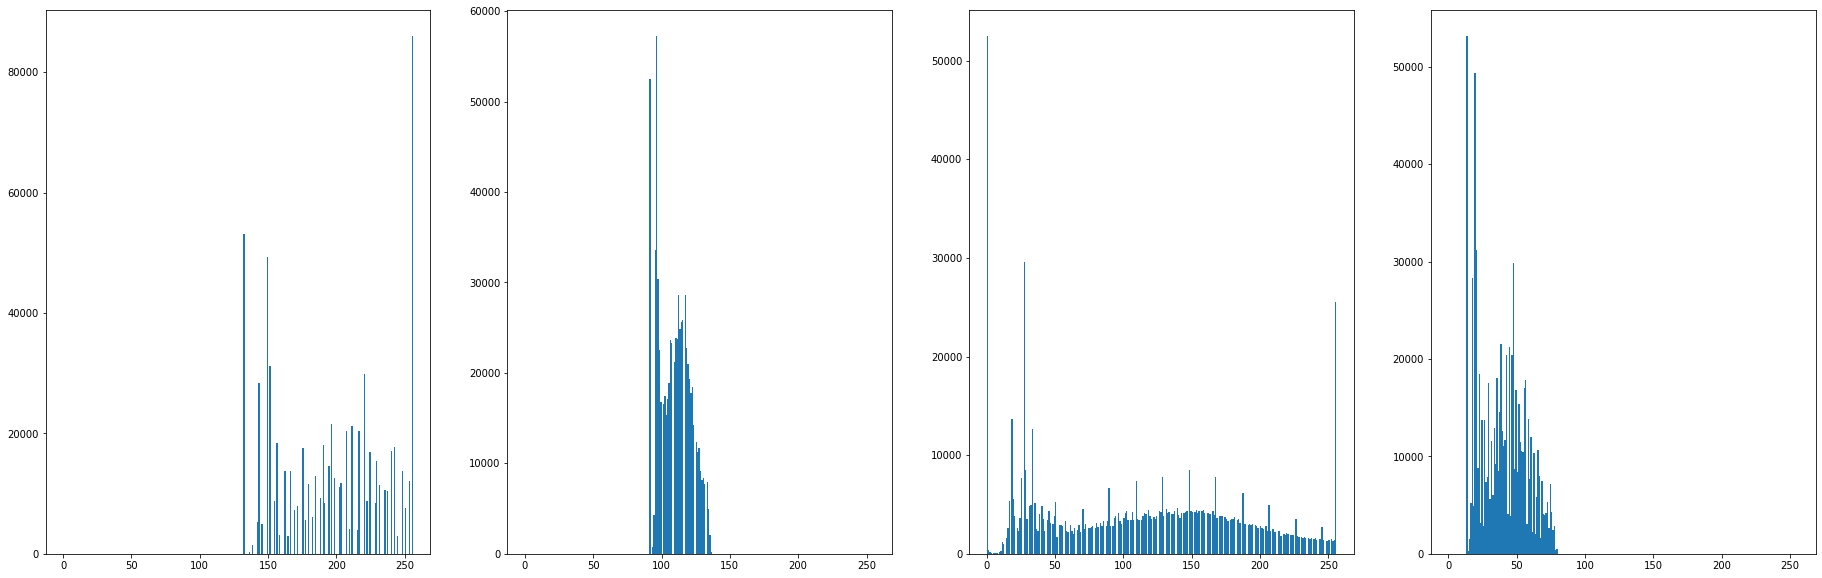

In [42]:
images = [img_1, img_2, img_3, img_4]
plt.figure(figsize = (40, 10))

for i in range(len(images)):
    plt.subplot(1, len(images) + 1, i + 1)
    plt.hist(images[i].ravel(), 256, [0, 256])

## Using the cv2 hist function

<ipython-input-43-149490f865a3>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(hist)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<StemContainer object of 3 artists>

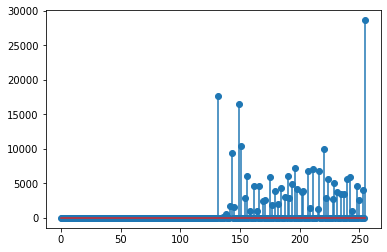

In [43]:
hist = cv2.calcHist([img_1], [0], None, [256], [0, 256])
plt.stem(hist)

# Histogram equalization

In [55]:
r, Nk = histogram_plot(img_1)
m, n = img_1.shape

In [56]:
print(m, n)

500 500


In [57]:
PDF = Nk/(m*n)
PDF1 = PDF.copy()
CDF = np.array(np.zeros(len(PDF)))
CDF[0] = PDF[0]

# Obtain CDF
for i in range(1, len(PDF)):
  CDF[i] = CDF[i - 1] + PDF[i]

Sk = CDF * 255
Sk = Sk.astype(int) # Rounding Sk Value

In [58]:
print(PDF)

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.     

In [70]:
print(Sk)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  18  18  18  18  18  18  18  18  18  18  20  30
  30  31  31  31  31  48  48  59  59  59  62  62  68  68  69  69  69  69
  74  74  75  75  79  79  79  82  82  84  84  84  84  90  90  92  92  96
  96  96  98  98 103 103 103 103 106 106 112 115 115 115 120 120 127 127
 131 131 131 131 135 139 139 139 139 146 146 148 148 155 155 155 155 156
 163 163 163 163 173 173 176 176 182 182 182 182 185 190 190 194 194 194
 194 197 197 201 201 201 207 207 213 213 214 214 21

In [72]:
Equ_img = np.zeros((m, n), dtype=int)
for i in range(m):
  for j in range(n):
    temp = img_1[i, j]
    Equ_img[i, j] = Sk[temp]

Equ_img = Equ_img.astype('int')

# Displaying the difference between the Original Image and the Equalized image.

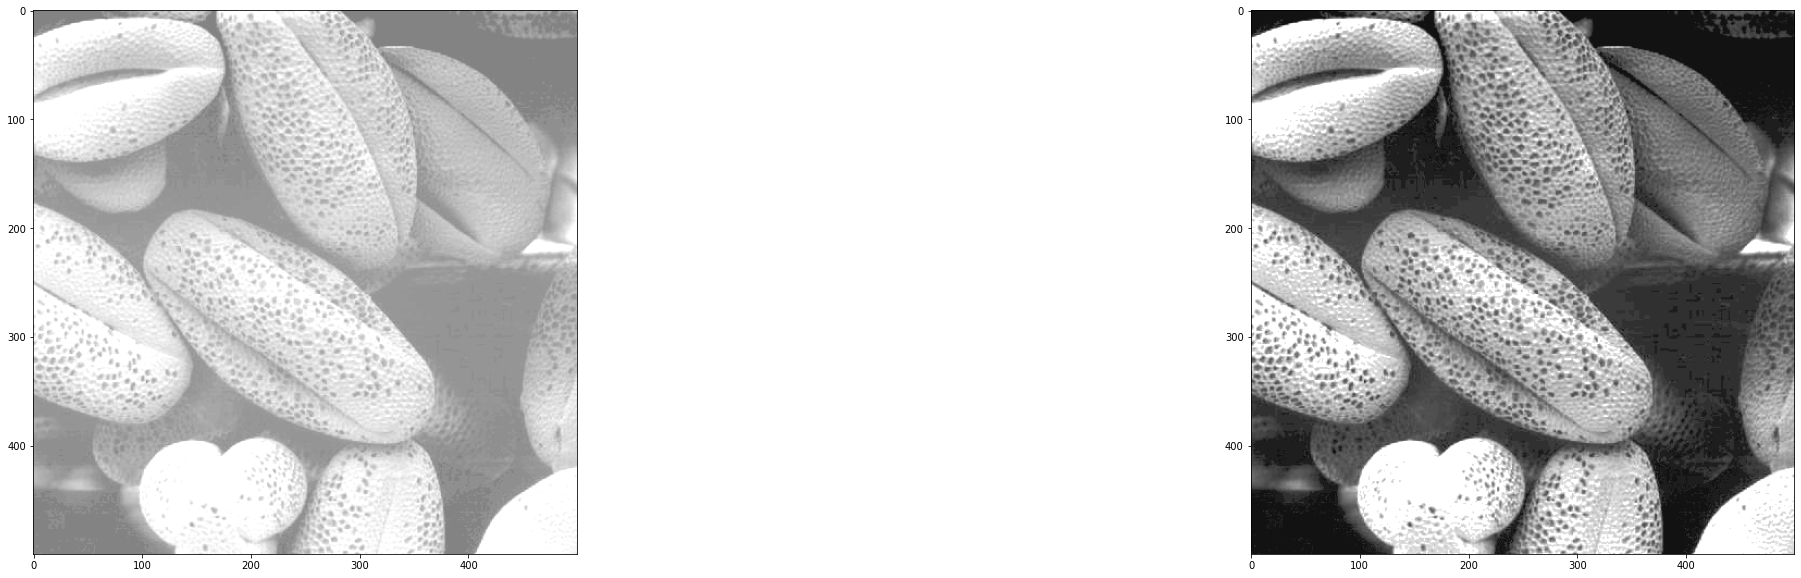

In [78]:
images = [img_1, Equ_img]
plt.figure(figsize = (40, 10))

for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i], cmap = "gray", vmin = 0, vmax = 255)

## Checking the plots displayed above by using built in histogram function of plt by plotting Histograms for the original image and the histogram plot.

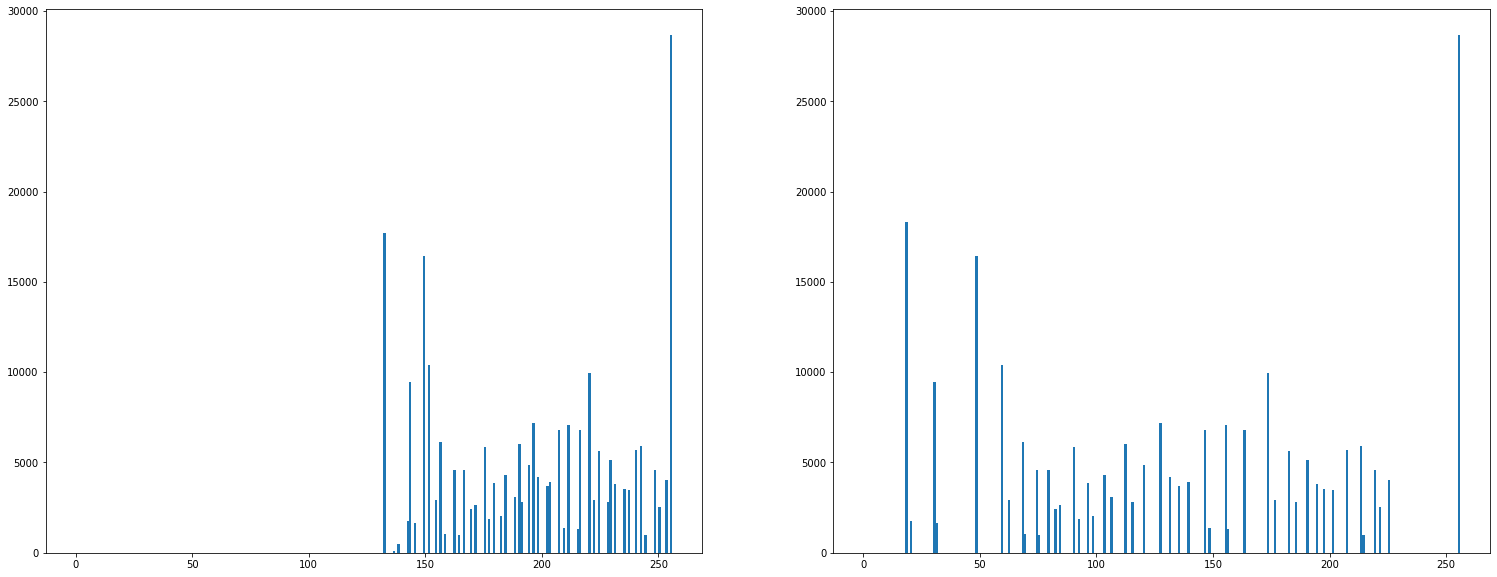

In [81]:
plt.figure(figsize = (40, 10))
for i in range(len(images)):
    plt.subplot(1, len(images) + 1, i + 1)
    plt.hist(images[i].ravel(), 256, [0, 256])

# Seeing whether the built in Equalize Histogram Function matches that of the Equalized image we obtained:

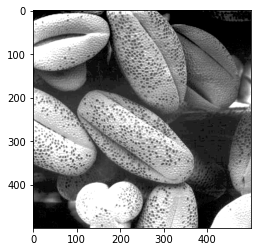

In [82]:
equ =  cv2.equalizeHist(img_1)
plt.imshow(equ, cmap = "gray", vmin = 0, vmax = 255)

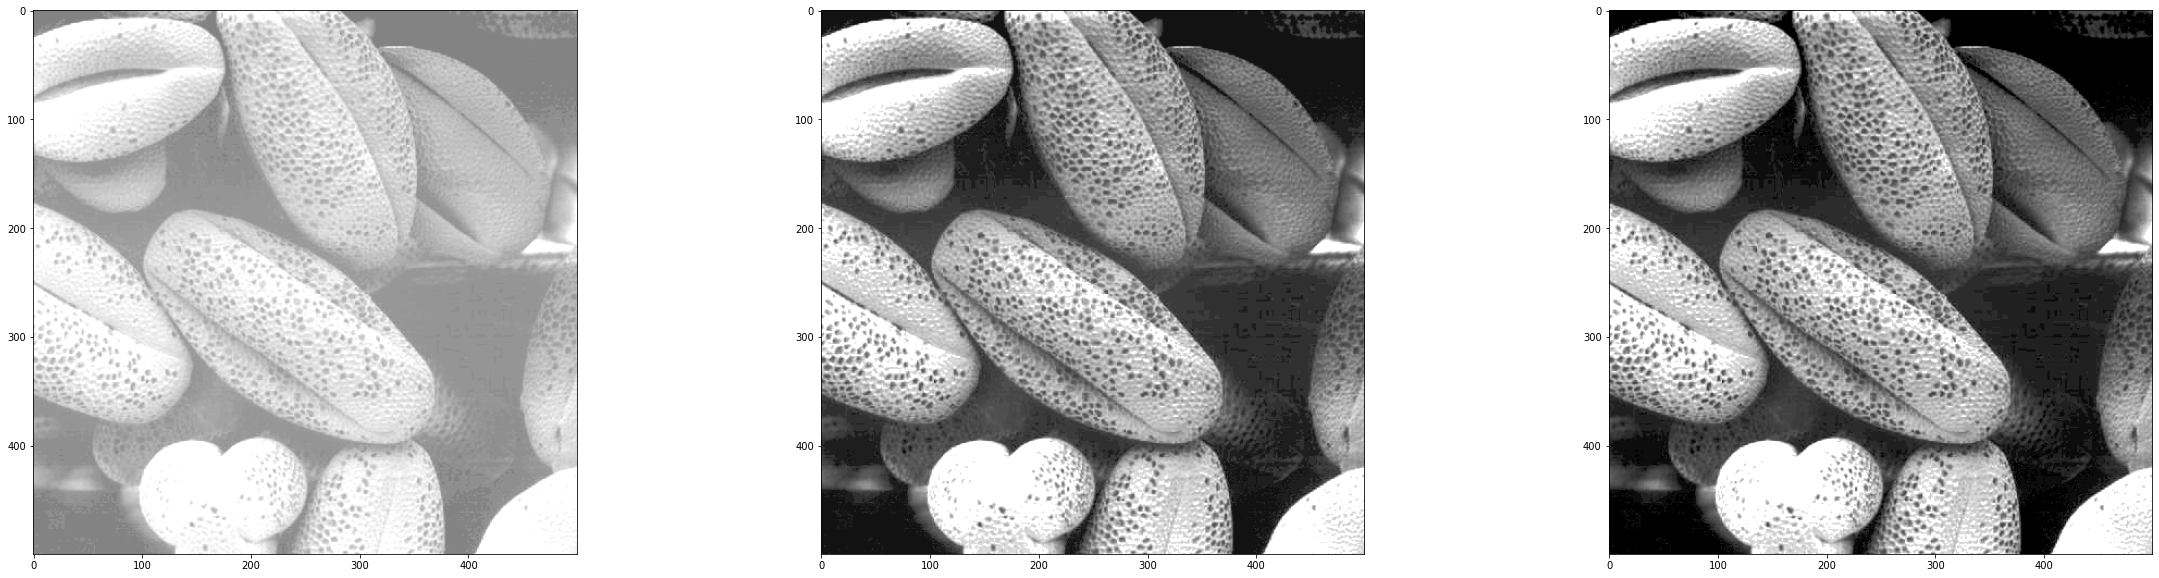

In [83]:
images = [img_1, Equ_img, equ]
plt.figure(figsize = (40, 10))

for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i], cmap = "gray", vmin = 0, vmax = 255)

# Conclusion:
## From the above experiment, I learnt the following:

1.  Classify the test images as low contrast, high contrast, dark and bright images by plotting their histograms.

2. Implement histogram equalization on the low contrast, dark and bright images.

3. Examine the effect of equalization on the test images by comparing the histograms of the test images with the equalized images.

4. The comparison between user defined functions and built in functions was done and the results proved to be the same.

